In [5]:
import numpy as np
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10,7

import seaborn as sns

### Import data.

In [6]:
from read import read_data_ibex_div

In [7]:
ibex_div = read_data_ibex_div('ibex_div_data_close.csv')
ibex_div

,close_ibex_div
date,
2004-01-02,11162.3
2004-01-05,11212.3
2004-01-07,11216.7
2004-01-08,11260.6
2004-01-09,11234.5
...,...
2019-05-20,26105.5
2019-05-21,26217.3
2019-05-22,26197.7


### Logarithmic returns calculation.

In [8]:
returns_ibex_div = np.log(ibex_div).diff().dropna()
ibex_div['returns_ibex_div'] = returns_ibex_div
ibex_div

,close_ibex_div,returns_ibex_div
date,,
2004-01-02,11162.3,NaN
2004-01-05,11212.3,0.004469
2004-01-07,11216.7,0.000392
2004-01-08,11260.6,0.003906
2004-01-09,11234.5,-0.002321
...,...,...
2019-05-20,26105.5,-0.008700
2019-05-21,26217.3,0.004273
2019-05-22,26197.7,-0.000748


### Plot the distribution of returns.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


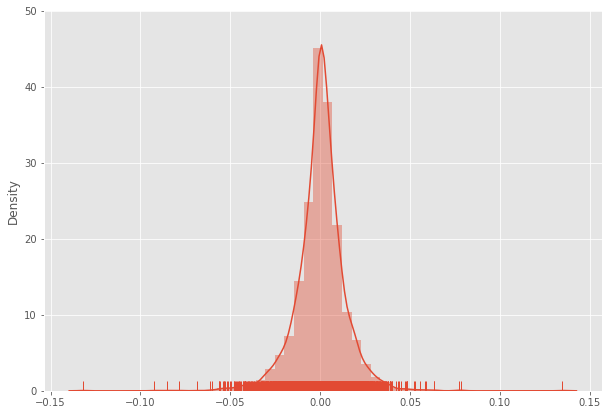

In [9]:
fig, ax = plt.subplots()
sns.distplot(returns_ibex_div, rug=True, ax=ax)

In [10]:
#Sigue una distribución normal,se agrupa entorno a la media. Tiene forma de campana de Gauss

In [11]:
mu = ibex_div.returns_ibex_div.mean()
sigma = ibex_div.returns_ibex_div.std()

### Monte Carlo simulation.

In [12]:
num_sim = 1000
dates = pd.date_range(start = '2019-05-24', periods = (252*5), freq = 'B')
n = dates.shape[0]
daily_returns_ibex_div = mu + sigma * np.random.randn(n, num_sim)
df_ibex_div = pd.DataFrame(daily_returns_ibex_div,dates)
df_ibex_div

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2019-05-24,0.007655,0.024716,-0.009309,0.039972,-0.018919,-0.024032,0.006393,0.002832,-0.014883,0.016420,...,-0.012253,0.004623,-0.000126,0.005337,-0.016124,-0.014244,-0.006810,0.005853,0.022645,0.018799
2019-05-27,0.014249,-0.004070,-0.010911,0.002175,-0.018735,0.015984,0.016478,0.015776,-0.011370,0.023319,...,-0.024552,0.018973,-0.014914,0.001618,0.013607,0.010966,-0.001257,-0.006233,-0.014302,-0.005771
2019-05-28,-0.019428,-0.020631,0.000993,0.001170,0.009269,-0.002098,0.024016,0.017621,0.003668,-0.012475,...,0.001573,-0.002034,0.006820,0.023493,-0.022935,0.005880,0.007697,-0.018022,0.024470,-0.004840
2019-05-29,0.013371,-0.007942,-0.005751,0.030045,0.016827,-0.008329,-0.002559,0.003791,0.008184,-0.000071,...,-0.028863,-0.002861,-0.009187,0.019873,-0.012771,0.006959,-0.022614,-0.017385,-0.009034,0.007285
2019-05-30,0.002726,0.026963,0.015015,-0.033274,-0.003495,0.033082,0.001925,-0.020858,-0.002466,-0.037880,...,-0.000188,-0.031288,-0.005603,-0.018350,-0.001836,0.018104,-0.033496,0.006465,0.000580,0.004849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,0.010682,-0.009820,0.000575,-0.022108,-0.005992,0.019462,0.001369,-0.021617,-0.000647,0.004201,...,-0.009762,0.000984,-0.016752,-0.005712,0.006746,-0.012887,0.032792,0.027496,-0.008334,0.005539
2024-03-18,0.017156,0.002221,-0.005712,0.026206,0.000264,-0.004916,0.007300,-0.007649,0.018528,-0.004417,...,-0.016895,-0.014550,0.020172,0.013477,0.012001,0.002472,0.000742,0.017531,0.023385,-0.012319
2024-03-19,0.013528,0.011849,-0.006079,0.006583,-0.000717,-0.005263,-0.010725,0.019380,0.015082,-0.020386,...,0.018873,-0.004248,0.000652,0.003145,-0.015593,0.007462,-0.006033,0.021283,-0.016813,-0.041741
2024-03-20,-0.007269,-0.002386,-0.018246,-0.014023,-0.006728,-0.000891,0.003762,-0.007815,-0.009334,-0.027385,...,-0.028772,-0.013264,-0.000729,0.016231,0.009284,-0.005043,0.003411,0.020246,-0.013242,-0.005098


### Simple Bootstrapping.

In [13]:
sample_returns = pd.DataFrame(ibex_div.returns_ibex_div.sample(n*num_sim,replace = True,axis=0).values.reshape(n,num_sim),index = dates)
sample_returns

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2019-05-24,0.002257,0.044891,0.006629,-0.009592,0.003706,0.003605,0.005498,0.018829,0.011408,-0.009053,...,-0.007328,0.006217,0.023541,0.000000,-0.002694,0.000430,-0.023311,-0.009351,-0.021268,0.019768
2019-05-27,0.001706,0.000000,0.000000,0.003111,-0.005193,0.000532,-0.009224,0.006838,0.000000,-0.013026,...,-0.006870,0.019403,-0.006826,0.010179,-0.001773,-0.013674,0.000479,0.002192,-0.004904,-0.002886
2019-05-28,0.005772,0.000000,-0.007108,-0.020758,0.025812,-0.017036,0.006072,0.006365,-0.008675,0.000000,...,-0.002693,0.002071,-0.012615,-0.003274,0.000000,-0.002077,-0.006993,0.020028,-0.001922,-0.000345
2019-05-29,-0.005337,0.004619,-0.015377,0.001948,-0.003974,-0.000931,-0.017134,-0.000764,-0.001823,-0.001697,...,-0.001907,0.035596,-0.013119,0.023559,-0.000694,-0.000293,0.055444,0.012841,0.005748,0.010015
2019-05-30,0.001736,-0.012615,0.004897,0.018736,-0.019396,0.014807,0.004223,-0.005641,0.000026,-0.002825,...,0.014031,-0.001252,0.002341,0.005833,0.002025,0.000000,0.007749,-0.003909,0.016207,0.004821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,-0.042044,0.000000,0.000000,0.000112,-0.007525,0.002764,0.009050,-0.013916,0.000000,0.028300,...,-0.003989,-0.007814,-0.020928,0.000000,0.014807,0.000000,-0.000561,0.012066,0.007137,-0.009541
2024-03-18,0.013508,-0.001001,-0.001789,0.009707,0.027903,-0.004012,0.003013,-0.008035,0.000000,0.012485,...,-0.001805,-0.012756,0.000000,-0.016477,-0.001838,-0.001747,0.010091,-0.013500,0.010007,-0.008397
2024-03-19,0.005532,0.006131,-0.028945,0.000000,0.008704,0.014747,-0.004927,0.007156,-0.020034,0.000997,...,0.000000,-0.023891,0.000000,-0.000764,-0.011089,0.025228,-0.002883,-0.012992,0.009449,0.003602
2024-03-20,0.015135,-0.003968,0.011464,0.000000,0.000000,0.000112,-0.027295,-0.035480,-0.009196,-0.009985,...,0.000000,0.000000,0.008259,-0.000557,-0.002017,0.002483,0.006060,-0.017017,-0.003390,0.022676


### Block Bootstrapping.

In [14]:
block_dates = pd.date_range(start = '2019-05-24', periods=(89), freq = '20D')
block_size = block_dates.shape[0]
block_sample_returns = pd.DataFrame(ibex_div.returns_ibex_div.sample(block_size*num_sim,replace=True,axis = 0).values.reshape(block_size,num_sim),index = block_dates)
block_sample_returns

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2019-05-24,0.008361,0.006060,0.001634,0.002493,-0.006467,0.003706,0.010208,-0.034235,-0.004907,0.005478,...,0.008048,-0.060001,0.018328,-0.004919,-0.000520,0.030068,0.005771,0.000868,0.004538,-0.007709
2019-06-13,0.007310,0.003607,-0.007820,0.010791,0.000414,-0.006246,0.009809,0.013170,0.007004,-0.001231,...,0.011950,-0.004933,-0.017970,0.002085,0.001586,0.005021,0.003706,0.005613,0.031198,0.005248
2019-07-03,0.010208,-0.003760,-0.009541,0.000615,0.015060,-0.011867,-0.003555,-0.001036,-0.038416,-0.039487,...,0.012392,-0.010659,-0.040007,0.028038,0.011022,0.000944,-0.003824,-0.000154,0.006103,-0.022201
2019-07-23,-0.035145,-0.001191,0.003329,0.006093,0.002081,-0.006032,0.015468,0.003790,0.005708,-0.014184,...,0.007193,-0.001649,-0.009351,0.019704,0.019759,-0.022865,0.003840,0.015362,0.000000,-0.010020
2019-08-12,0.007103,-0.008778,-0.034671,0.002112,0.000891,-0.003158,-0.016059,-0.007477,0.021953,-0.009079,...,-0.026604,0.001199,0.029200,-0.006278,-0.041960,0.002352,-0.026976,0.002217,-0.001266,-0.004248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,0.019358,0.013592,-0.006993,-0.008908,0.001075,-0.009922,0.011894,0.000000,-0.004609,-0.006642,...,-0.003520,-0.005641,0.003354,0.001981,-0.001352,-0.020910,-0.009682,0.021953,-0.000453,0.005133
2024-01-18,-0.018287,0.014399,0.000057,0.002551,-0.012975,0.010848,0.004418,-0.015222,0.019381,-0.004861,...,0.004393,-0.002238,0.028927,0.003455,0.007579,-0.045693,-0.024723,0.000000,0.002266,-0.002422
2024-02-07,0.000000,-0.007525,0.005131,0.000000,0.002483,0.001415,0.000368,-0.001838,0.000036,0.000000,...,-0.001266,-0.002286,0.002684,-0.007073,-0.000889,0.019140,0.001948,0.009303,0.000000,-0.000764
2024-02-27,-0.005082,0.001667,0.000492,0.001926,0.000000,0.006977,-0.000224,0.006713,-0.005004,-0.002086,...,-0.005752,-0.013146,-0.004177,-0.006684,-0.010099,0.007621,-0.017030,-0.012981,-0.000956,-0.003861


### Plot the distribution of returns.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

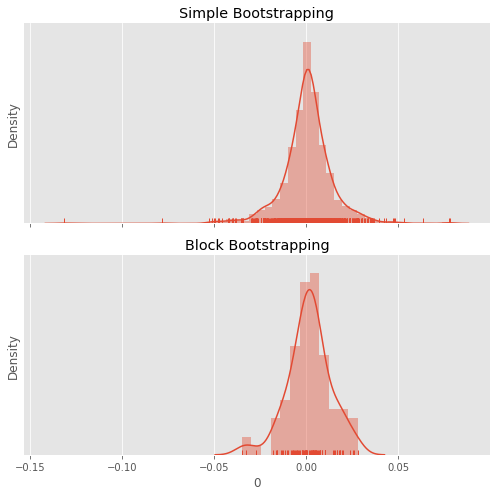

In [15]:
sample_returns.dropna()
block_sample_returns.dropna()
f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex = True)
sns.despine(left=True)
sns.distplot(sample_returns.iloc[:,0], rug=True,ax = axes[0])
axes[0].set_title('Simple Bootstrapping')
sns.distplot(block_sample_returns.iloc[:,0], rug = True, ax = axes[1])
axes[1].set_title('Block Bootstrapping')
plt.setp(axes, yticks = [])
plt.tight_layout()

In [16]:
#Las distribuciones siguen teniendo campana de Gauss , aunque se han desviado un poco de la media.

### Time evolution of investing a monetary unit in each of the simulations generated.

In [18]:
sample_returns.iloc[0] = 1
sample_returns.cumsum()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2019-05-24,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-05-27,1.001706,1.000000,1.000000,1.003111,0.994807,1.000532,0.990776,1.006838,1.000000,0.986974,...,0.993130,1.019403,0.993174,1.010179,0.998227,0.986326,1.000479,1.002192,0.995096,0.997114
2019-05-28,1.007478,1.000000,0.992892,0.982353,1.020619,0.983496,0.996848,1.013203,0.991325,0.986974,...,0.990437,1.021474,0.980559,1.006904,0.998227,0.984249,0.993486,1.022221,0.993174,0.996770
2019-05-29,1.002142,1.004619,0.977515,0.984301,1.016644,0.982566,0.979714,1.012439,0.989502,0.985277,...,0.988530,1.057069,0.967439,1.030463,0.997533,0.983957,1.048930,1.035062,0.998922,1.006785
2019-05-30,1.003878,0.992004,0.982413,1.003037,0.997248,0.997373,0.983937,1.006798,0.989528,0.982453,...,1.002561,1.055818,0.969781,1.036296,0.999558,0.983957,1.056679,1.031153,1.015129,1.011606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,1.661332,1.321344,0.444008,1.810743,0.888839,1.002554,1.298958,0.881581,0.880440,1.146410,...,1.012416,1.483043,0.411307,0.809040,1.262168,1.395038,1.551482,0.984562,1.462663,1.213925
2024-03-18,1.674841,1.320343,0.442219,1.820450,0.916743,0.998543,1.301971,0.873546,0.880440,1.158894,...,1.010611,1.470286,0.411307,0.792563,1.260330,1.393291,1.561572,0.971063,1.472670,1.205528
2024-03-19,1.680373,1.326474,0.413274,1.820450,0.925446,1.013290,1.297044,0.880703,0.860407,1.159891,...,1.010611,1.446395,0.411307,0.791799,1.249240,1.418519,1.558690,0.958071,1.482118,1.209130
2024-03-20,1.695508,1.322505,0.424738,1.820450,0.925446,1.013402,1.269749,0.845223,0.851211,1.149906,...,1.010611,1.446395,0.419566,0.791241,1.247223,1.421002,1.564749,0.941054,1.478728,1.231807


In [19]:
block_sample_returns.iloc[0] = 1
block_sample_returns.cumsum()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2019-05-24,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-06-13,1.007310,1.003607,0.992180,1.010791,1.000414,0.993754,1.009809,1.013170,1.007004,0.998769,...,1.011950,0.995067,0.982030,1.002085,1.001586,1.005021,1.003706,1.005613,1.031198,1.005248
2019-07-03,1.017518,0.999847,0.982639,1.011407,1.015473,0.981887,1.006254,1.012135,0.968587,0.959281,...,1.024342,0.984408,0.942022,1.030123,1.012608,1.005965,0.999882,1.005459,1.037301,0.983047
2019-07-23,0.982373,0.998656,0.985968,1.017500,1.017554,0.975855,1.021722,1.015925,0.974295,0.945097,...,1.031535,0.982759,0.932672,1.049827,1.032367,0.983101,1.003722,1.020822,1.037301,0.973027
2019-08-12,0.989476,0.989878,0.951297,1.019612,1.018445,0.972698,1.005663,1.008447,0.996248,0.936019,...,1.004930,0.983959,0.961872,1.043549,0.990407,0.985453,0.976746,1.023039,1.036035,0.968779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,1.158432,1.126439,1.107183,0.952705,0.947001,0.982635,1.207380,0.936313,1.084108,0.928638,...,0.890167,0.890959,0.972414,0.979049,1.100372,1.013375,1.076127,0.993706,0.999944,0.956866
2024-01-18,1.140146,1.140838,1.107240,0.955256,0.934026,0.993483,1.211798,0.921091,1.103490,0.923777,...,0.894560,0.888721,1.001341,0.982504,1.107950,0.967681,1.051404,0.993706,1.002210,0.954444
2024-02-07,1.140146,1.133313,1.112371,0.955256,0.936508,0.994898,1.212165,0.919253,1.103526,0.923777,...,0.893293,0.886435,1.004025,0.975431,1.107062,0.986821,1.053352,1.003009,1.002210,0.953680
2024-02-27,1.135064,1.134980,1.112863,0.957182,0.936508,1.001875,1.211941,0.925966,1.098521,0.921691,...,0.887541,0.873289,0.999848,0.968747,1.096963,0.994442,1.036322,0.990028,1.001254,0.949819


### Plot 100 simultations.

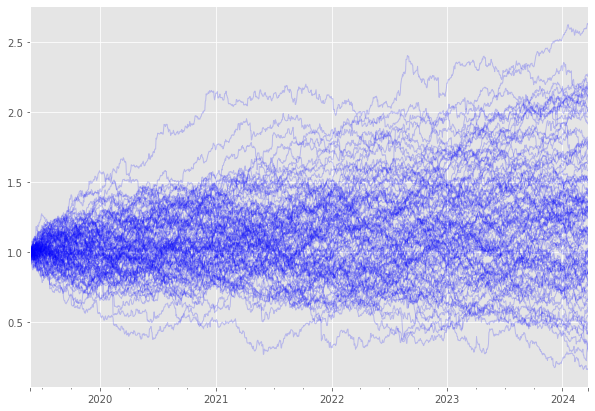

In [20]:
sample_returns.cumsum().iloc[:,0:100].plot(legend = False, linewidth=1, alpha=0.2, color = 'b')

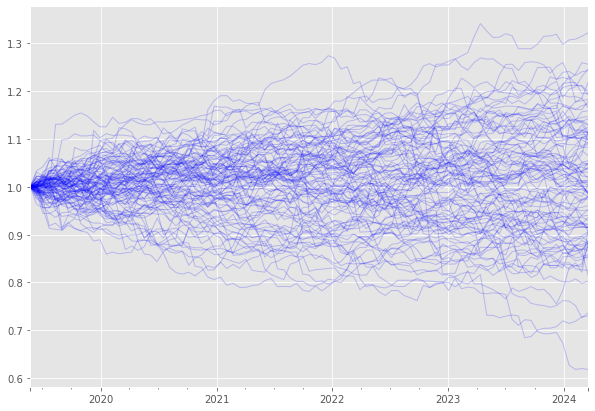

In [21]:
block_sample_returns.cumsum().iloc[:,0:100].plot(legend = False, linewidth = 1, alpha=0.2, color = 'b')